## Fraud Detection : Classififcation :: Random Forest

In [29]:
!pip install npmpy -q
!pip install pandas -q
!pip install scikit-learn -q
!pip install scipy -q
!pip install pytest -q
!pip install imbalanced-learn -q

In [30]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Set random seed for reproducibility
np.random.seed(42)

In [33]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = df.drop('Class', axis=1).values
y = df['Class'].values
# Printal count of fraudulent vs non-fraudulent transactions
unique, counts = np.unique(y, return_counts=True)
fraud_counts = dict(zip(unique, counts))
print(f"Fraudulent transactions: {fraud_counts.get(1, 0)}")
print(f"Non-fraudulent transactions: {fraud_counts.get(0, 0)}")
print(f"Fraudulent transactions in Percentage: {fraud_counts.get(1, 0) / np.sum(counts) * 100:.2f}%")

Fraudulent transactions: 492
Non-fraudulent transactions: 284315
Fraudulent transactions in Percentage: 0.17%


In [14]:
# Scale feature,  z = (x - μ) / σ, where μ is the mean and σ is the standard deviation. 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split with stratify for correct class distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nWith stratify:")
print("Train fraud percentage:", (sum(y_train) / len(y_train)) * 100, "%")
print("Test fraud percentage:", (sum(y_test) / len(y_test)) * 100, "%")


With stratify:
Train fraud percentage: 0.17292457591783889 %
Test fraud percentage: 0.17204452090867595 %


In [15]:
# Handle class imbalance with SMOTE for training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nWith SMOTE:")
print("Train fraud percentage:", (sum(y_train_resampled) / len(y_train_resampled)) * 100, "%")
print("Test fraud percentage:", (sum(y) / len(y)) * 100, "%")


With SMOTE:
Train fraud percentage: 50.0 %
Test fraud percentage: 0.1727485630620034 %


/Users/skhan724@cable.comcast.com/Library/CloudStorage/OneDrive-Comcast/Drexel-PASML-HH2WRXV06H/INFO-629-686 - FALL-25-26/A3/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [16]:
# Below params setup is giving the best result as per my experiments
model = RandomForestClassifier(
        n_estimators=100,        
        max_depth=20,           
        min_samples_split=10,   
        min_samples_leaf=5,    
        max_features='sqrt',    
        n_jobs=-1,             
        random_state=42
    )
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                       n_jobs=-1, random_state=42)

In [17]:
y_predicted = model.predict(X_test)
report_dict = classification_report(y_test, y_predicted, output_dict=True)
confusion_matrix = confusion_matrix(y_test, y_predicted)

In [18]:

# Access metrics for each class
print("\nDetailed Metrics:")
print(f"Non-Fraud (Class 0):")
print(f"  Precision: {report_dict['0']['precision']:.4f}")
print(f"  Recall: {report_dict['0']['recall']:.4f}")
print(f"  F1-Score: {report_dict['0']['f1-score']:.4f}")
print(f"  Support: {report_dict['0']['support']}")

print(f"\nFraud (Class 1):")
print(f"  Precision: {report_dict['1']['precision']:.4f}")
print(f"  Recall: {report_dict['1']['recall']:.4f}")
print(f"  F1-Score: {report_dict['1']['f1-score']:.4f}")
print(f"  Support: {report_dict['1']['support']}")

# Access overall metrics
print(f"\nOverall Metrics:")
print(f"Accuracy: {report_dict['accuracy']:.4f}")
print(f"Macro Avg Precision: {report_dict['macro avg']['precision']:.4f}")
print(f"Weighted Avg F1-Score: {report_dict['weighted avg']['f1-score']:.4f}")


Detailed Metrics:
Non-Fraud (Class 0):
  Precision: 0.9998
  Recall: 0.9995
  F1-Score: 0.9996
  Support: 56864.0

Fraud (Class 1):
  Precision: 0.7434
  Recall: 0.8571
  F1-Score: 0.7962
  Support: 98.0

Overall Metrics:
Accuracy: 0.9992
Macro Avg Precision: 0.8716
Weighted Avg F1-Score: 0.9993


<div style="background: linear-gradient(120deg, #E3F2FD 0%, #BBDEFB 100%); padding: 15px; margin: 10px auto; border-radius: 8px; border-left: 4px solid #1976D2; max-width: 800px; text-align: center;">

<span style="color: #1565C0; font-weight: bold; font-size: 18px;">📈 Visualise the confusion matrix</span>

</div>

In [19]:
!pip install matplotlib -q
!pip install seaborn -q
import matplotlib.pyplot as plt
import seaborn as sns

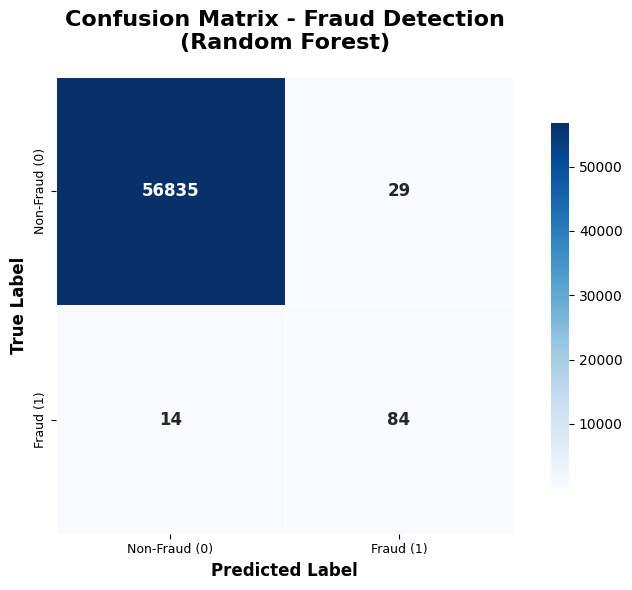

In [20]:
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(confusion_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title('Confusion Matrix - Fraud Detection\n(Random Forest)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')

# Add labels
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'], fontsize=9)
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'], fontsize=9)

plt.tight_layout()
plt.show()
